<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 787, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 787 (delta 51), reused 95 (delta 36), pack-reused 660
Receiving objects: 100% (787/787), 23.50 MiB | 9.26 MiB/s, done.
Resolving deltas: 100% (308/308), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-9s5m5oez
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-9s5m5oez
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=b819455cc7773a0c4e024a7eb5febe2cdd75c0e9b82ad6558ca41dcc82092f4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-aw3irp_p/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc909ee3

In [2]:
import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-12-23 14:47:20--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.51, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   237MB/s    in 13s     

2023-12-23 14:47:33 (187 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from clip_embeding import ClipEmbedding
clip = ClipEmbedding()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [118]:
import matplotlib.pyplot as plt

def show_image(image):
  plt.figure(figsize=(2,2))
  plt.title(f'image')
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [6]:
from PIL import Image
image_path = '../../images/'
image = Image.open(image_path+'image_1.jpg')

In [47]:
image = Image.open(image_path+'image_1.jpg')
texts = ['a cat sleeping in a pink couch',
         'pink',
         'a cat sleeping',
         'a cat sleeping in a pink couch with a remote control',
         'a cat sleeping on a couch with a remote control',
         'a brown cat sleeping in a pink couch with a remote control',
         'a brown cat sleeping in a pink couch with a remote control left side',
         'a brown cat sleeping in a pink couch with a remote control left side, a dog, a cat, a sofa, a couch, a man',
         'a brown cat sleeping in a pink couch with a remote control in left side, in right side are another cat sleeping, in center just are a pink couch'
         ]

texts = [f'a photo of {text}' for text in texts]

In [133]:
image = Image.open(image_path+'image_3.jpg')
texts = [
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the right side, and a dog laying on a pillow in the left side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the side, and a dog laying on a pillow in the side ',
    'a cat and a dog siting in a orange couch, a cat with a smile on its face in the left, and a dog laying on a pillow in the right ',
    'a cat and a dog siting in a couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side ',
    'a cat and a dog siting in a couch',
    'a cat and a dog siting in a orange couch',
    'green couch',
    'red couch',
    'yellow couch',
    'blue couch',
    'orange couch',
    'blue pillow',
    'orange pillow',
    'yellow pillow',
    'a gray cat siting on a couch with a smile on its face',
    'a gray cat slaying on a couch with a smile on its face',
    'a gray cat slaying on a orange couch with a smile on its face',
    'a gray cat slaying with a smile on its face',
    'a gray cat with a smile on its face',
    'a gray dog with a smile on its face',
  ]

texts = [f'a photo of {text}' for text in texts]

In [136]:
# image_embedding = clip.get_image_embedding(image)
seg_image = process.segmentations[10]
image_embedding = clip.get_image_embedding(seg_image)
text_embedding = clip.get_text_embedding(texts)
# print(text_embedding)

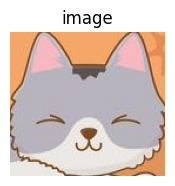

0.2497461587190628: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the right side, and a dog laying on a pillow in the left side 
0.2524509131908417: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side 
0.2629620432853699: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the side, and a dog laying on a pillow in the side 
0.25396811962127686: a photo of a cat and a dog siting in a orange couch, a cat with a smile on its face in the left, and a dog laying on a pillow in the right 
0.23267517983913422: a photo of a cat and a dog siting in a couch, a cat with a smile on its face in the left side, and a dog laying on a pillow in the right side 
0.219318225979805: a photo of a cat and a dog siting in a couch
0.24871858954429626: a photo of a cat and a dog siting in a orange couch
0.17659080028533936: a photo of green c

In [137]:
show_image(seg_image)

for text_emb, text in zip(text_embedding, texts):
    print(clip.calculate_similarity(image_embedding[0], text_emb), end = ": ")
    # print(clip.calculate_similarity(subembeddings[10], text_emb) * 1.1, end = ": ")
    print(text)

In [9]:
from clip_embeding import ProcessImages
process = ProcessImages()

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


In [85]:
subembeddings = process.get_embedding_segmentations(image_path= image_path+'image_3.jpg',segmentation= 'box')

In [82]:
process.ranking(image_path+'image_1.jpg', 'box')
# image_embedding = clip.get_image_embedding(image)
# print(clip.calculate_similarity(image_embedding[0], subembeddings[0]))

KeyboardInterrupt: ignored

In [18]:
# similarity = (100.0 * image_embedding @ text_embedding.T).softmax(dim=-1)
similarity = (0.15 * image_embedding @ subembeddings.T).softmax(dim=-1)
values, indices = similarity[0].topk(10)
print (similarity)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{index}: {100 * value.item():.2f}%")

tensor([[0.0045, 0.0038, 0.0082, 0.0036, 0.2351, 0.0159, 0.0050, 0.0153, 0.0181,
         0.6581, 0.0275, 0.0047]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

Top predictions:

9: 65.81%
4: 23.51%
10: 2.75%
8: 1.81%
5: 1.59%
7: 1.53%
2: 0.82%
6: 0.50%
11: 0.47%
0: 0.45%


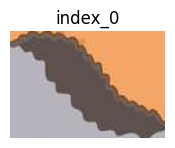

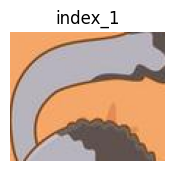

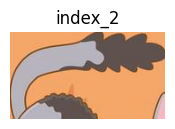

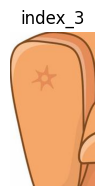

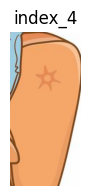

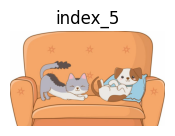

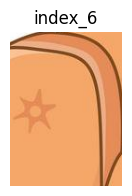

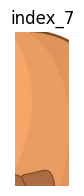

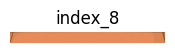

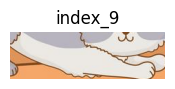

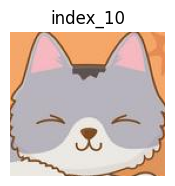

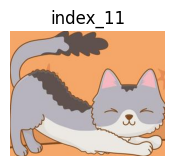

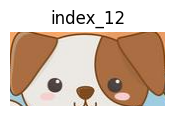

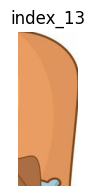

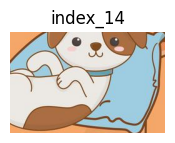

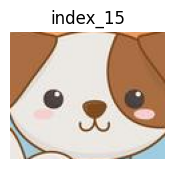

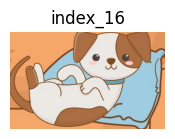

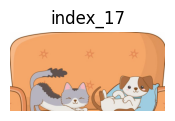

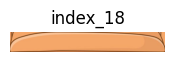

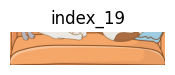

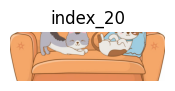

In [86]:
process.show_images()